# KILT-4-1-Check out (2539 vs 1270)

- Evalutaion on FiD results on KILT NQ using (BM25/Random) Samples
    - By Position
    - By Number of Context

In [1]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


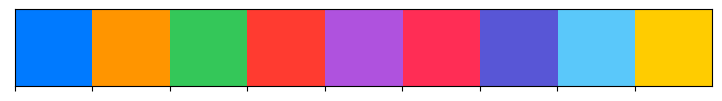

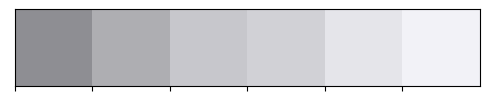

In [3]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [4]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [5]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative 

In [6]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [7]:
option = 'bm25'
path = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ'
plot_path = './img/New_FiDResultOnBM25HardnegativeNQdevSubsets.png'
title = 'New FiD result on BM25 negative nq dev subsets'

In [8]:
path = pathlib.Path(path)

In [9]:
files = path.glob('**/*.txt')
files = path.glob('**/*.txt')
pprint(list(files))

[PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos3_context3/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos4_context4/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context2/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context5/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos3_context4/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context1/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos2_context3/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos2_context4/final_output.txt'),
 PosixPath('/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos3_context5/fin

In [10]:
dict_eval = {
    'pos' : [],
    'ctx' : [],
    'em' : []
}

sample_size = 5
for pos in range(1, sample_size+1):
    for ctx in range(pos, sample_size+1):
    
#         # bm25 negative filenames
#         file_name_ = f'kilt_dpr_nq_dev_pos{pos}_context{ctx}'

        # random sampling negative filenames
        if option == 'random':
            file_name_ = f'kilt_rand_nq_dev_pos{pos}_context{ctx}'
            file = list(path.glob(f'*{file_name_}*/*.txt'))
            test = file[0] 
        # DPR should be changed to bm25
        if option == 'bm25':
            file_name_ = f'kilt_bm25_nq_dev_pos{pos}_context{ctx}'
            file = list(path.glob(f'*{file_name_}*/*.txt'))
            test = file[0] 
        
        print(test)
        
        df = pd.read_csv(test, sep = '\t', header=None)
        df.columns = ['id','inference','em']
        print(len(df))
        em = float(sum(df['em'])/len(df))
        
        dict_eval['pos'].append(pos)
        dict_eval['ctx'].append(ctx)
        dict_eval['em'].append(em)
        
        

/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context1/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context2/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context3/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context4/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos1_context5/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos2_context2/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos2_context3/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos2_context4/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos2_context5/final_output.txt
2539
/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/kilt_bm25_nq_dev_pos3_c

In [11]:
# test

In [12]:
df = pd.DataFrame(data=dict_eval)
# print(dict_eval)

pos_set = set(df['pos'])

In [13]:
from cycler import cycler
# marker='*',
# default_cycler = (cycler(markers=['1', '2', '3' ,'4','8']))
c = plt.cycler(color=["Blue", "Orange", "Green",'Red','Purple'],
               markersize=[10, 10, 10, 10, 10],
               marker=["o", "s", "^", '1', '3'])
plt.rcParams["axes.prop_cycle"] = c

# plt.rc('axes', prop_cycle=default_cycler)

In [14]:
df

,pos,ctx,em
0,1,1,0.678614
1,1,2,0.647105
2,1,3,0.632926
3,1,4,0.625837
4,1,5,0.622686
5,2,2,0.647105
6,2,3,0.632926
7,2,4,0.625837
8,2,5,0.622686
9,3,3,0.632926


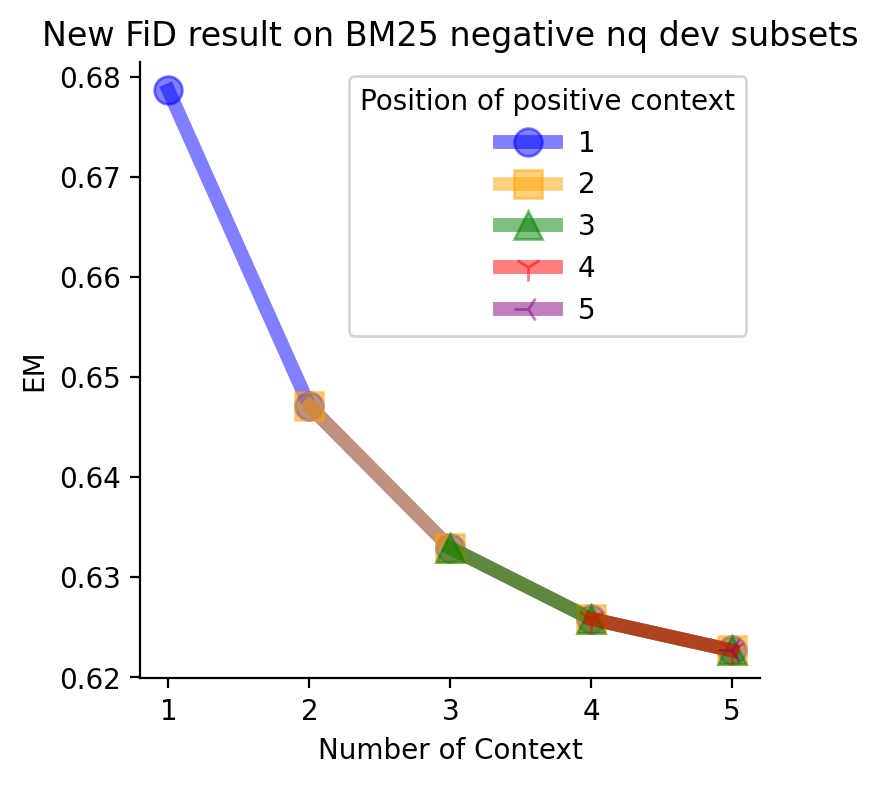

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xticks(sorted(list(pos_set)))
for pos in pos_set:
    selected_data = df.loc[df['pos'] == pos]
#     print(selected_data)
    ax.plot(selected_data['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)
    
# ax.set_title('FiD result on BM25 hard negative nq dev subsets')
ax.set_title(title)
ax.legend(title='Position of positive context')
plt.ylabel('EM')
plt.xlabel('Number of Context')
plt.savefig(plot_path, dpi=300)
plt.show()

## Check out the weired behavior. (2539 vs 1270)

In [ ]:
def read_file(ctx):
    file_1 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ/kilt_dpr_nq_dev_pos1_context{ctx}/final_output.txt'
    file_2 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated/kilt_dpr_nq_dev_pos1_context{ctx}/final_output.txt'
    
    df_1 = pd.read_csv(file_1, sep = '\t', header=None)
    df_1.columns = ['id','inference','em']

    df_2 = pd.read_csv(file_2, sep = '\t', header=None)
    df_2.columns = ['id','inference_2','em_2']

    merged = pd.merge(df_1, df_2, on='id',how='left')
    
    return merged

In [ ]:
merged_1 = read_file(1)

In [ ]:
merged_1

In [ ]:
merged_2 = read_file(2)

In [ ]:
merged_2

In [ ]:
merged_2

In [ ]:
def check_consistency(merged):
    # merged_not_null where merged.em_2 is not null
    merged_not_null = merged[merged.em_2.notnull()]
    # merge_is_null where merged.em_2 is null
    merged_is_null = merged[merged.em_2.isnull()]


    # check inference == inference_2 
    # adjusting NaN on inference (NaN is the answer to the query)
    merged_not_null['inference'] = merged_not_null['inference'].fillna('NaN')
    merged_not_null['inference_2'] = merged_not_null['inference_2'].fillna('NaN')


    # check inference == inference_2 
    print(all(merged_not_null.inference == merged_not_null.inference_2))
    

In [ ]:
merged_2_not_null = merged_2[merged_2.em_2.notnull()]
merged_2_is_null = merged_2[merged_2.em_2.isnull()]

In [ ]:
merged_2_not_null['inference'] = merged_2_not_null['inference'].fillna('NaN')
merged_2_not_null['inference_2'] = merged_2_not_null['inference_2'].fillna('NaN')

In [ ]:
all(merged_2_not_null.inference == merged_2_not_null.inference_2)

In [ ]:
len(merged_2_not_null) - sum(merged_2_not_null.inference == merged_2_not_null.inference_2)

In [ ]:
merged_2_not_null

In [ ]:
check_consistency(merged_2)

In [ ]:
# merged_not_null where merged.em_2 is not null
merged_not_null = merged[merged.em_2.notnull()]
# merge_is_null where merged.em_2 is null
merged_is_null = merged[merged.em_2.isnull()]


# check inference == inference_2 
# adjusting NaN on inference (NaN is the answer to the query)
merged_not_null['inference'] = merged_not_null['inference'].fillna('NaN')
merged_not_null['inference_2'] = merged_not_null['inference_2'].fillna('NaN')


# check inference == inference_2 
all(merged_not_null.inference == merged_not_null.inference_2)

In [ ]:
ctx = 1
file_1 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ/kilt_dpr_nq_dev_pos1_context{ctx}/final_output.txt'
file_2 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated/kilt_dpr_nq_dev_pos1_context{ctx}/final_output.txt'

In [ ]:
df_1 = pd.read_csv(file_1, sep = '\t', header=None)
df_1.columns = ['id','inference','em']

df_2 = pd.read_csv(file_2, sep = '\t', header=None)
df_2.columns = ['id','inference_2','em_2']

merged = pd.merge(df_1, df_2, on='id',how='left')

In [ ]:
merged

In [ ]:
ctx = 1
file_1 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ/kilt_dpr_nq_dev_pos1_context{ctx}/final_output.txt'
file_2 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated/kilt_dpr_nq_dev_pos1_context{ctx}/final_output.txt'

In [ ]:
df_1 = pd.read_csv(file_1, sep = '\t', header=None)
df_1.columns = ['id','inference','em']

df_2 = pd.read_csv(file_2, sep = '\t', header=None)
df_2.columns = ['id','inference_2','em_2']

merged = pd.merge(df_1, df_2, on='id',how='left')

In [ ]:
# merged_not_null where merged.em_2 is not null
merged_not_null = merged[merged.em_2.notnull()]
# merge_is_null where merged.em_2 is null
merged_is_null = merged[merged.em_2.isnull()]


# check inference == inference_2 
# adjusting NaN on inference (NaN is the answer to the query)
merged_not_null['inference'] = merged_not_null['inference'].fillna('NaN')
merged_not_null['inference_2'] = merged_not_null['inference_2'].fillna('NaN')


# check inference == inference_2 
all(merged_not_null.inference == merged_not_null.inference_2)

In [ ]:
print(merged.em.sum())
merged.em.sum() == merged.em_2.sum() + merged_is_null.em.sum()

In [ ]:
def calculate_ems(merged):
#     em_1 = float(merged.em.sum()/len(merged))
#     em_2 = float(merged.em_2.sum()/merged.em_2.notnull().sum())
    em_1 = float(merged.em.sum())
    em_2 = float(merged.em_2.sum())
    print(f'total em : {em_1}, half em : {em_2}')
    return em_1, em_2

In [ ]:
def cacluate_sem(merged):
#     em = float(merged_is_null.em.sum()/len(merged_is_null))
    em = float(merged_is_null.em.sum())
    print(f'rest em score : {em}')
    return em

In [ ]:
def seperate(merged):
    merged_is_null = merged[merged.em_2.isnull()]

    return merged_is_null

In [ ]:
em_1, em_2 = calculate_ems(merged)
merged_s = seperate(merged)
em_d = cacluate_sem(merged_s)

In [ ]:
def checking_datas(file_1, file_2):
    # file_1 is 2539 instances
    # file_2 is 1270 instacnes
    df_1 = pd.read_csv(file_1, sep = '\t', header=None)
    df_1.columns = ['id','inference','em']
    
    df_2 = pd.read_csv(file_2, sep = '\t', header=None)
    df_2.columns = ['id','inference_2','em_2']

    merged = pd.merge(df_1, df_2, on='id',how='left')
    
    if all(merged[merged.em_2.notnull()].em == merged[merged.em_2.notnull()].em_2):
        print(f'Same outputs on same quetions')
    return merged

In [ ]:
def get_ems(i, j):
    file_1 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ/kilt_dpr_nq_dev_pos{i}_context{j}/final_output.txt'
    file_2 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated/kilt_dpr_nq_dev_pos{i}_context{j}/final_output.txt'
    
    # checking whether datas with same id have identitical result
    merged = checking_datas(file_1, file_2)
    
    em_1, em_2 = calculate_ems(merged)
    merged_s = seperate(merged)
    em_d = cacluate_sem(merged_s)
    
    return em_1, em_2, em_d

In [ ]:
dict_eval = {
    'total' : [],
    'half' : [],
    'rest' : [],
    'ctx' : [],
}
pos = 1
for j in range(1,6):
    em_1, em_2, em_r = get_ems(pos, j)
    dict_eval['total'].append(em_1)
    dict_eval['half'].append(em_2)
    dict_eval['rest'].append(em_r)
    dict_eval['ctx'].append(j)

In [ ]:
df = pd.DataFrame(data=dict_eval)

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(df['ctx'], df['total'], label='total', alpha = 0.5, linewidth=5)
ax.plot(df['ctx'], df['half'], label='half', alpha = 0.5, linewidth=5)
ax.plot(df['ctx'], df['rest'], label='rest', alpha = 0.5, linewidth=5)
# ax.set_title(title)
ax.legend(title='Position of positive context')
plt.ylabel('EM')
plt.xlabel('Number of Context')
# plt.savefig(plot_path, dpi=300)
plt.show()


In [ ]:
inf_2

In [ ]:
ids

In [ ]:
def checking_datas(file_1, file_2):
    # file_1 is 2539 instances
    # file_2 is 1270 instacnes
    df_1 = pd.read_csv(file_1, sep = '\t', header=None)
    df_1.columns = ['id','inference','em']
    
    df_2 = pd.read_csv(file_2, sep = '\t', header=None)
    df_2.columns = ['id','inference_2','em_2']

    merged = pd.merge(df_1, df_2, on='id',how='left')
    
    # Check they have the same inference where merged.em_2 is not mull
    merged[].
    if merged[merged.em_2.notnull()].inference = merged[merged.em_2.notnull()].inference_2:
        print(f'same predictions on same quetions')
#     if len(merged[merged.em == merged.em_2]) == len(df_2):
#         print(f'same predictions')
    return merged

In [ ]:
# len(merged) - merged.em_2.notnull().sum()

In [ ]:
# len(merged[merged.inference == merged.inference_2])

In [ ]:
# merged[merged.inference == merged.inference_2]

In [ ]:
# checking_datas(file_1, file_2)

In [ ]:
# merged

In [ ]:
# merged.em_2.isnull().sum()

In [ ]:
merged[merged.em_2.notnull()]

In [ ]:
def calculate_ems(merged):
    em_1 = float(sum(merged['em'])/(len(merged) - merged.em.isnull().sum()))
    em_2 = float((merged[merged.em_2.notnull()]/(len(merged) - merged.em_2.isnull().sum()))
    print(f'em_scores : {em_1}, {em_2}')
    return em_1, em_2

In [ ]:
dict_eval = {
    '2539' : [],
    '1270' : [],
    'ctx' : [],
}

In [ ]:
def checking_module(i, j):
    file_1 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ/kilt_dpr_nq_dev_pos{i}_context{j}/final_output.txt'
    file_2 = f'/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated/kilt_dpr_nq_dev_pos{i}_context{j}/final_output.txt'
    
    # checking whether datas with same id have identitical result
    merged = checking_datas(file_1, file_2)
    
    em_1, em_2 = calculate_ems(merged)
    return em_1, em_2 

In [ ]:
pos = 1
for j in range(1,6):
    em_1, em_2 = checking_module(pos, j)
    dict_eval['2539'].append(em_1)
    dict_eval['1270'].append(em_2)
    dict_eval['ctx'].append(j)

In [ ]:
df = pd.DataFrame(data=dict_eval)

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(df['ctx'], df['1270'], label='1270', alpha = 0.5, linewidth=5)
ax.plot(df['ctx'], df['2539'], label='2539', alpha = 0.5, linewidth=5)
# ax.set_title(title)
ax.legend(title='Position of positive context')
plt.ylabel('EM')
plt.xlabel('Number of Context')
# plt.savefig(plot_path, dpi=300)
plt.show()

In [ ]:
selected_data = df.loc[df['pos'] == pos]

In [ ]:
pos_set = set(df['pos'])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.set_xticks(sorted(list(pos_set)))
for pos in pos_set:
    selected_data = df.loc[df['pos'] == pos]
#     print(selected_data)
    ax.plot(selected_data['ctx'], selected_data['em'], label=pos, alpha = 0.5, linewidth=5)
    
# ax.set_title('FiD result on BM25 hard negative nq dev subsets')
ax.set_title(title)
ax.legend(title='Position of positive context')
plt.ylabel('EM')
plt.xlabel('Number of Context')
# plt.savefig(plot_path, dpi=300)
plt.show()

## Checking Dataset

In [ ]:
from util import utils

In [ ]:

for pos in range(1,6):
    filename = f'/data/philhoon-relevance/FiD/open_domain_data/NQ_KILT_DPR/kilt_dpr_nq_dev_pos{pos}.json'
    data = utils.open_json(filename)
    
    for pair in data:
        answer_lst = pair['answers']
        context_lst = pair['ctxs']
        pos_cts = context_lst[pos-1]['t']
        
        
#     break

In [ ]:
filename

In [ ]:
pprint(len(data))

In [ ]:
pprint(data[10])